In [2]:
origdata = pd.read_csv('train.csv')

In [3]:
origdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
origdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
origdata.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
origdata.loc[origdata['Transported'] == False, 'Transported'] = 0
origdata.loc[origdata['Transported'] == True, 'Transported'] = 1
origdata.loc[origdata['VIP'] == False, 'VIP'] = 0
origdata.loc[origdata['VIP'] == True, 'VIP'] = 1
origdata.loc[origdata['CryoSleep'] == False, 'CryoSleep'] = 0
origdata.loc[origdata['CryoSleep'] == True, 'CryoSleep'] = 1

In [7]:
origdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [8]:
data = origdata.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,Willy Santantines,1


In [9]:
data['Spendings'] = origdata['RoomService'] + origdata['FoodCourt'].values + origdata['ShoppingMall'].values + origdata['Spa'].values + origdata['VRDeck'].values
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Spendings
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,Maham Ofracculy,0,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,Juanna Vines,1,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,Altark Susent,0,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,Solam Susent,0,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,Willy Santantines,1,1091.0


In [10]:
# pairplot(data)

In [11]:
# data.to_csv('spendings.csv')

In [12]:
# tmp = origdata[['VIP','Transported']].dropna()
# tmp

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
# mean_squared_error(tmp['Transported'], tmp['VIP'])

In [15]:
# tmp[tmp['VIP'] == 1]['Transported'].sum()/tmp.shape[0]

In [16]:
# From the block above we can guess thak 'VIP' has no effect on 'Transported'
# data.drop(columns="VIP", inplace=True)

In [17]:
# data.columns

In [18]:
from matplotlib import pyplot as plt

In [19]:
# составить график с первыми буквами

In [21]:
data1 = data[['Name', 'Transported']].dropna()
data1['Name'] = pd.DataFrame(list(map(lambda x: x[0], data1['Name'])))

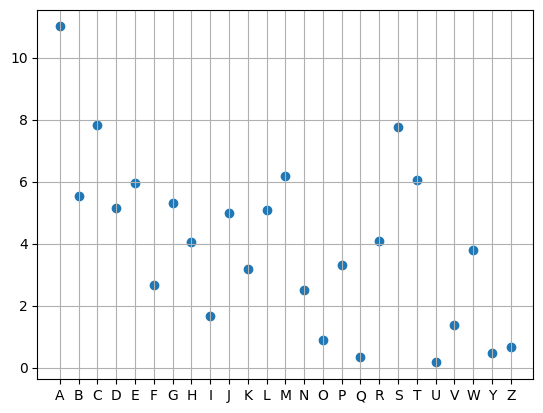

In [22]:
data1.dropna(inplace=True)
tmp = {}
tmp1 = data1['Transported'].sum()
for i in sorted(data1['Name'].unique()):
    tmp[i] = data1[data1['Name'] == i]['Transported'].sum() / tmp1 * 100
plt.grid()
plt.scatter(tmp.keys(), tmp.values())

In [23]:
data['Name'] = data1['Name']

In [24]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Spendings
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,M,0,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,J,1,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,A,0,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,S,0,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,W,1,1091.0


In [25]:
data.sort_values('Cabin')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Spendings
114,0119_02,Europa,1,A/0/P,TRAPPIST-1e,13.0,0,M,1,0.0
113,0119_01,NaN,0,A/0/P,TRAPPIST-1e,39.0,0,M,0,9307.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,A,0,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,S,0,5176.0
52,0056_01,Europa,0,A/1/S,TRAPPIST-1e,2.0,0,I,1,0.0
...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,NaN,55 Cancri e,53.0,0,I,0,NaN
8475,9057_01,Europa,0,NaN,55 Cancri e,36.0,1,A,0,7397.0
8485,9069_03,Europa,1,NaN,55 Cancri e,25.0,0,P,1,0.0
8509,9081_03,Earth,1,NaN,TRAPPIST-1e,1.0,0,NaN,0,0.0


In [32]:
data2 = data[['Cabin', 'Transported']].dropna()

cnt = 0
res = 0
for i in sorted(data2['Cabin'].unique()):
    cnt += 1
    tmp = data2[data2['Cabin'] == i]['Transported'].sum() / data2[data2['Cabin'] == i]['Cabin'].shape[0]
    if tmp == 1 or tmp == 0:
        res += 1
    
print('res:', res)
print('count:', cnt)

res: 5951
count: 6560


In [33]:
data3 = data[['HomePlanet', 'Transported']].dropna()

In [35]:
cnt = 0
res = 0
for i in sorted(data3['HomePlanet'].unique()):
    cnt += 1
    print(data3[data3['HomePlanet'] == i]['Transported'].sum() / data3[data3['HomePlanet'] == i]['HomePlanet'].shape[0])
    
    
print('res:', res)
print('count:', cnt)

0.42394611038678837
0.65884561238855
0.5230244457077885
res: 0
count: 3


In [10]:
# data.drop(columns='PassengerId', inplace=True)
# data.drop(columns='VIP', inplace=True)

data.drop(columns=['PassengerId', 'VIP', 'HomePlanet'], inplace=True)
data.head()

,CryoSleep,Cabin,Destination,Age,Name,Transported,Spendings
0,0,B/0/P,TRAPPIST-1e,39.0,Maham Ofracculy,0,0.0
1,0,F/0/S,TRAPPIST-1e,24.0,Juanna Vines,1,736.0
2,0,A/0/S,TRAPPIST-1e,58.0,Altark Susent,0,10383.0
3,0,A/0/S,TRAPPIST-1e,33.0,Solam Susent,0,5176.0
4,0,F/1/S,TRAPPIST-1e,16.0,Willy Santantines,1,1091.0


In [26]:
# data.info()
tmpdata = origdata

In [38]:
tmpdata['VRDeck'].fillna(0, inplace=True)
tmpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


In [39]:
tmpdata['Spendings'] = tmpdata['RoomService'] + tmpdata['FoodCourt'].values + tmpdata['ShoppingMall'].values + tmpdata['Spa'].values + tmpdata['VRDeck'].values
tmpdata.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
tmpdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Spendings
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,Maham Ofracculy,0,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,Juanna Vines,1,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,Altark Susent,0,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,Solam Susent,0,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,Willy Santantines,1,1091.0


In [65]:
tmpdata.drop(columns=['PassengerId', 'HomePlanet', 'VIP', 'Name', 'CryoSleep'], inplace=True)
tmpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cabin        8494 non-null   object 
 1   Destination  8511 non-null   object 
 2   Age          8514 non-null   float64
 3   Transported  8693 non-null   object 
 4   Spendings    8693 non-null   float64
dtypes: float64(2), object(3)
memory usage: 339.7+ KB


In [43]:
tmpdata.describe()

,Age,Spendings
count,8514.000000,8693.000000
mean,28.827930,1440.866329
std,14.489021,2803.045694
min,0.000000,0.000000
25%,19.000000,0.000000
50%,27.000000,716.000000
75%,38.000000,1441.000000
max,79.000000,35987.000000


In [56]:
data1 = tmpdata[['CryoSleep', 'Transported']].convert_dtypes(int)
data1.dropna(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8476 entries, 0 to 8692
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CryoSleep    8476 non-null   Int64
 1   Transported  8476 non-null   Int64
dtypes: Int64(2)
memory usage: 215.2 KB


In [59]:
# переместились из криосна
data1[data1['CryoSleep'] == 1]['Transported'].sum() / data1.shape[0]

0.2929447852760736

In [60]:
# переместились не из криосна
data1[data1['CryoSleep'] == 0]['Transported'].sum() / data1.shape[0]

0.21106654082114204

In [71]:
data = tmpdata.dropna().convert_dtypes()
# for i in data.columns:
    # data[i] = pd.to_numeric(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cabin        8144 non-null   string
 1   Destination  8144 non-null   string
 2   Age          8144 non-null   Int64 
 3   Transported  8144 non-null   Int64 
 4   Spendings    8144 non-null   Int64 
dtypes: Int64(3), string(2)
memory usage: 405.6 KB


In [67]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='Transported'), data['Transported'], test_size=25)

In [68]:
clf = RandomForestClassifier()

In [69]:
clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'G/1244/S'

In [ ]:
clf.score(x_test, y_test)

0.68